Importing all packages

In [216]:
#importing Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import math
import scipy.stats as stats
from math import sqrt

In [94]:
CSR_file=pd.read_csv ('311_Service_Requests_from_2010_to_Present.csv',parse_dates=['Created Date', 'Closed Date'],low_memory=False)
print(CSR_file.head())

   Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   
3    32305098 2015-12-31 23:57:46 2016-01-01 07:43:00   NYPD   
4    32306529 2015-12-31 23:56:58 2016-01-01 03:24:00   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Stree

In [3]:
# Gathering information about the file
print(CSR_file.shape)

(300698, 53)


In [3]:
#Reading All columns
print(CSR_file.columns)

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [151]:
#Calculating Request Closing time
CSR_file['Request_Closing_Time']= CSR_file['Closed Date'] - CSR_file['Created Date']
CSR_file['Request_Closing_Time'].duplicated(keep = False)
print(CSR_file['Request_Closing_Time'].head(10))
print(CSR_file.columns)

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
5   01:53:30
6   01:57:28
7   01:47:55
8   08:33:02
9   01:23:02
Name: Request_Closing_Time, dtype: timedelta64[ns]
Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type'

Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

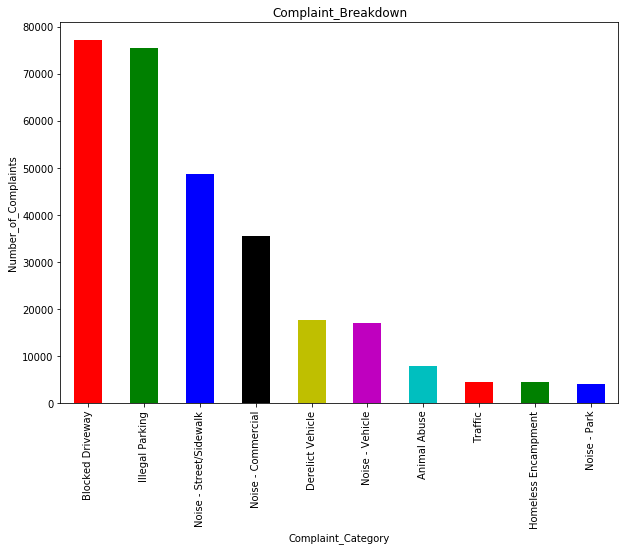

In [169]:
#Complaint type Breakdown with bar plot to figure out majority of complaint types and top 10 complaints
CSR_file['Complaint Type'].value_counts().head(10).plot(kind='bar',figsize=(10,7),color=list('rgbkymc'))
plt.xlabel('Complaint_Category')
plt.ylabel('Number_of_Complaints')
plt.title('Complaint_Breakdown')
plt.show()
#Conclusion1=Maximum no of complaints are for Blocked Delivery followed by illigal parking

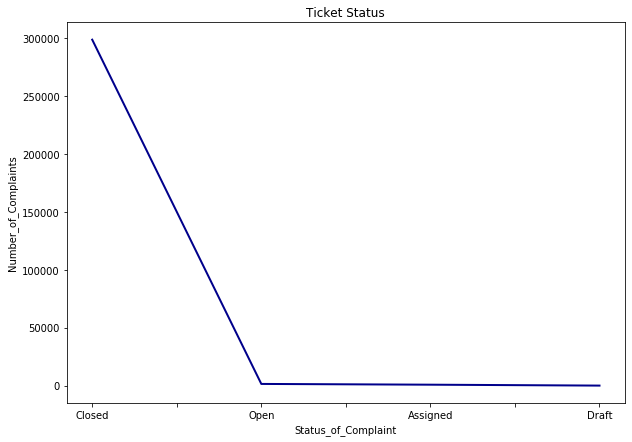

In [61]:
#Status of tickets
CSR_file['Status'].value_counts().plot(kind='line',color='darkblue',linewidth=2,figsize=(10,7))
plt.xlabel('Status_of_Complaint')
plt.ylabel('Number_of_Complaints')
plt.title('Ticket Status')
plt.show()
#Conclusion 2=No. of Open, Assigned and Draft tickets is zero shos the efficiency of the Customer Care Center that is closing all tickets

In [67]:
#Plotting Major Complaint types
max_complaints=CSR_file.groupby("Complaint Type")
sort_max_complaints = max_complaints.size().sort_values(ascending = False).to_frame('count').reset_index()
print(sort_max_complaints.head(15))

              Complaint Type  count
0           Blocked Driveway  77044
1            Illegal Parking  75361
2    Noise - Street/Sidewalk  48612
3         Noise - Commercial  35577
4           Derelict Vehicle  17718
5            Noise - Vehicle  17083
6               Animal Abuse   7778
7                    Traffic   4498
8        Homeless Encampment   4416
9               Noise - Park   4042
10                   Vending   3802
11                  Drinking   1280
12  Noise - House of Worship    931
13     Posting Advertisement    650
14       Urinating in Public    592


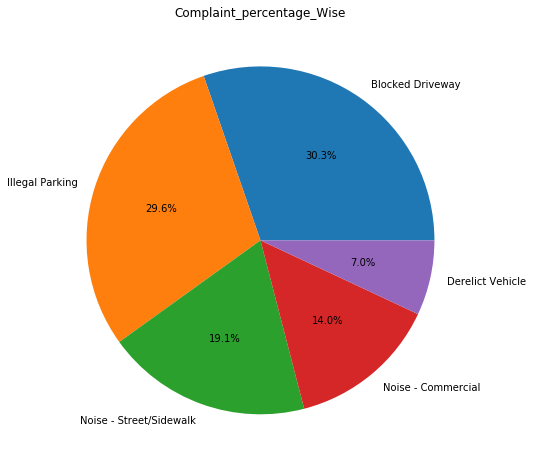

In [76]:
#pie Chart for Complaints to visualise percentage contribution
sort_max_complaints = sort_max_complaints.head()
plt.figure(figsize=(10,8))
plt.pie(sort_max_complaints['count'],labels=sort_max_complaints["Complaint Type"], autopct="%1.1f%%")
plt.title('Complaint_percentage_Wise')
plt.show()
#Conclusion 3= Illigal parking anf Blocked Driveway contributes to the maximum % of complaints

In [153]:
def toHr(timeDel):
    days = timeDel.days
    hours = round(timeDel.seconds/3600, 2)
    result = (days * 24) + hours
    return result

In [154]:
CSR_file['Request_Closing_In_Hr'] = CSR_file['Request_Closing_Time'].apply(toHr)
CSR_file['Request_Closing_In_Hr'].head()

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_In_Hr, dtype: float64

In [158]:
# Categorizing Ticket Closure time as Fast, Slow, Very Slow and Acceptable
def hrToCategory(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr < 2.0):
        return 'Fast'
    elif (4.0 > hr >= 2.0):
        return 'Acceptable'
    elif (6.0 > hr >= 4.0):
        return 'Slow'
    else:
        return 'Very Slow'
CSR_file['Request_Closing_Time_Category'] = CSR_file['Request_Closing_In_Hr'].apply(hrToCategory)
CSR_file['Request_Closing_Time_Category'].head()

0          Fast
1          Fast
2          Slow
3     Very Slow
4    Acceptable
Name: Request_Closing_Time_Category, dtype: object

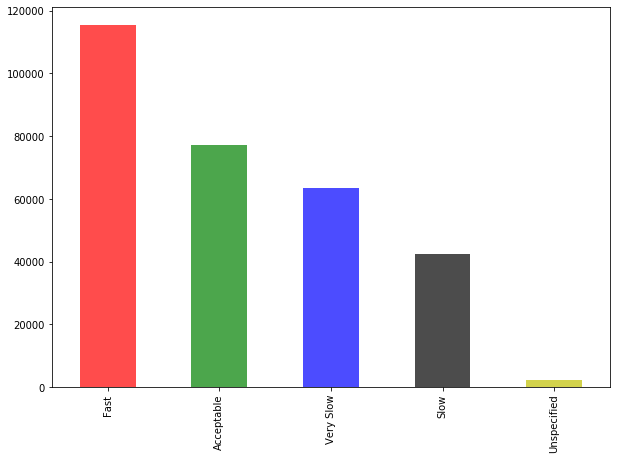

In [164]:
CSR_file['Request_Closing_Time_Category'].value_counts().plot(kind="bar", color=list('rgbkymc'), alpha=0.7, figsize=(10,7))
plt.show()
#Conclusion 4= No. of tickets are closed well before time ande fall under Fast category

In [204]:
#City with maximum no. of complaints
City_with_max_complaint=CSR_file.groupby("City")
City_with_max_complaint_sorting = City_with_max_complaint.sum().sort_values("Unique Key",ascending = False).head(10)
print(City_with_max_complaint_sorting)

                  Unique Key  Incident Zip  X Coordinate (State Plane)  \
City                                                                     
BROOKLYN       3078182595526  1.103022e+09                9.774336e+10   
NEW YORK       2063880948263  6.616886e+08                6.499733e+10   
BRONX          1273275732157  4.258114e+08                4.130491e+10   
STATEN ISLAND   386876152318  1.272265e+08                1.167332e+10   
JAMAICA         228227999383  8.341781e+07                7.588198e+09   
ASTORIA         198321808723  7.028830e+07                6.355664e+09   
FLUSHING        187222496067  6.781323e+07                6.175527e+09   
RIDGEWOOD       161734067432  5.878076e+07                5.231682e+09   
CORONA          134600820600  4.882556e+07                4.392211e+09   
WOODSIDE        110938943841  4.032008e+07                3.579294e+09   

               Y Coordinate (State Plane)  School or Citywide Complaint  \
City                                

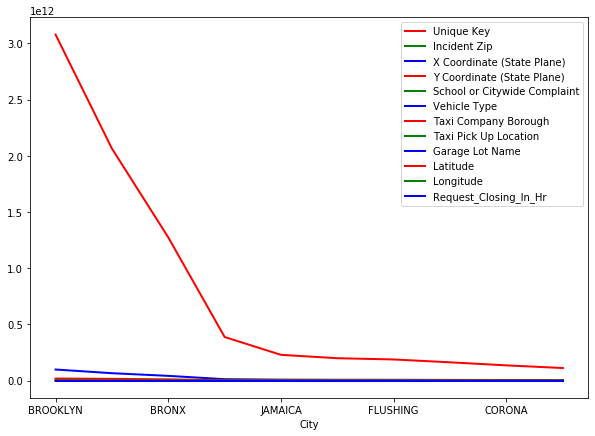

In [202]:
City_with_max_complaint_sorting.plot(kind='line',color='rgb',linewidth=2,figsize=(10,7))
plt.show()
#Conclusion 5= Maximum no of complaints have been booked from Brooklyn

Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [194]:
# Finding null values in field City
CSR_file['City'].isnull().sum()
#There are 2614 null values that we will replace

2614

In [201]:
# Replacing Null values with Not Avialable
CSR_file['City'].fillna('Not Available', inplace=True)
CSR_file['City']

0              NEW YORK
1               ASTORIA
2                 BRONX
3                 BRONX
4              ELMHURST
              ...      
300693    Not Available
300694    RICHMOND HILL
300695         BROOKLYN
300696            BRONX
300697         NEW YORK
Name: City, Length: 300698, dtype: object

In [206]:
# Grouping City (location) first and Complain Type in that
City_Group = CSR_file.groupby(['City', 'Complaint Type'])
# Finding average of City grouping, and get Request_Closing_Time column from there
City_Group_Mean = City_Group.mean()['Request_Closing_In_Hr']
City_Group_Mean.isnull().sum()

4

In [213]:
# Aggregating City Group by Request closing in hour
City_Group_Aggregate = City_Group.agg({'Request_Closing_In_Hr': 'mean'})
print(City_Group_Aggregate)

                                  Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]


In [208]:
#Finding Null values
City_Group_Aggregate[City_Group_Aggregate['Request_Closing_In_Hr'].isnull()]

Request_Closing_In_Hr
City          Complaint Type                                 
Not Available Ferry Complaint                             NaN
              Noise - House of Worship                    NaN
              Panhandling                                 NaN
              Posting Advertisement                       NaN

In [212]:
#Dropping NAN
City_Group_Aggregate_noNA=City_Group_Aggregate.dropna()
print(City_Group_Aggregate_noNA)

                                  Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[778 rows x 1 columns]


In [215]:
# Sorting by column - Request_Closing_In_Hr for City on grouped
City_Group_Sorted = City_Group_Aggregate_noNA.sort_values(['City', 'Request_Closing_In_Hr'])
print(City_Group_Sorted)

                                  Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Drinking                              0.240000
         Vending                               0.480000
         Urinating in Public                   0.690000
         Panhandling                           1.030000
         Noise - Park                          1.285000
...                                                 ...
Woodside Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Blocked Driveway                      6.405455

[778 rows x 1 columns]


Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?

In [217]:
#Using ANOVA for first one
# H0 : All Complain Types average response time mean is similar
# H1 : Not similar
CSR_file['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [218]:
#Finding top 5 complaint types
top5_complaints_type = CSR_file['Complaint Type'].value_counts()[:5]
print(top5_complaints_type)

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64


In [219]:
#top 5 complaint names
top5_complaints_type_names = top5_complaints_type.index
top5_complaints_type_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [222]:
sample_data = CSR_file.loc[CSR_file['Complaint Type'].isin(top5_complaints_type_names), ['Complaint Type', 'Request_Closing_In_Hr']]
sample_data.head()

,Complaint Type,Request_Closing_In_Hr
0,Noise - Street/Sidewalk,0.92
1,Blocked Driveway,1.44
2,Blocked Driveway,4.86
3,Illegal Parking,7.75
4,Illegal Parking,3.45


In [223]:
#Removing null in sample data
sample_data.isnull().sum()

Complaint Type              0
Request_Closing_In_Hr    2059
dtype: int64

In [224]:
sample_data.dropna(how='any', inplace=True)
sample_data.isnull().sum()

Complaint Type           0
Request_Closing_In_Hr    0
dtype: int64

In [225]:
s1 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[0]].Request_Closing_In_Hr
s1.head()

1     1.44
2     4.86
7     1.80
9     1.38
10    7.80
Name: Request_Closing_In_Hr, dtype: float64

In [226]:
s2 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[1]].Request_Closing_In_Hr
s2.head()

3    7.75
4    3.45
5    1.89
6    1.96
8    8.55
Name: Request_Closing_In_Hr, dtype: float64

In [227]:
s3 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[2]].Request_Closing_In_Hr
s3.head()

0     0.92
12    2.48
19    0.78
38    0.49
54    1.50
Name: Request_Closing_In_Hr, dtype: float64

In [228]:
s4 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[3]].Request_Closing_In_Hr
s4.head()

17    0.85
18    2.93
22    1.26
29    2.50
30    1.99
Name: Request_Closing_In_Hr, dtype: float64

In [229]:
s5 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[4]].Request_Closing_In_Hr
s5.head()

14     10.49
151     3.95
255     1.36
256     4.13
295     0.75
Name: Request_Closing_In_Hr, dtype: float64

In [230]:
print(s1.isnull().sum())
print(s2.isnull().sum())
print(s3.isnull().sum())
print(s4.isnull().sum())
print(s5.isnull().sum())

0
0
0
0
0


In [231]:
stats.f_oneway(s1, s2, s3, s4, s5)
#Conclusion: As pvalue is less than 0.05 so we can reject null hypothesis and average response time is not same.

F_onewayResult(statistic=1799.598683238952, pvalue=0.0)

In [232]:
#### Using ChiSquare Test for Are the type of complaint or service requested and location related?
# H0 : 2 categories - Complain Type and Location is independent means not related
# Ha : 2 categories - Complain Type and Location is dependent means related
top5_location = CSR_file['City'].value_counts()[:5]
top5_location

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
Name: City, dtype: int64

In [233]:
top5_location_names = top5_location.index
top5_location_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA'], dtype='object')

In [236]:
sample_data_location_c_type = CSR_file.loc[(CSR_file['Complaint Type'].isin(top5_complaints_type_names)) & (CSR_file['City'].isin(top5_location_names)), ['Complaint Type', 'City']]
sample_data_location_c_type.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK


In [237]:
pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['City'], margins=True)

City,BRONX,BROOKLYN,JAMAICA,NEW YORK,STATEN ISLAND,All
Complaint Type,,,,,,
Blocked Driveway,12755,28148,2818,2072,2142,47935
Derelict Vehicle,1953,5181,954,537,1766,10391
Illegal Parking,7859,27462,1421,12128,4886,53756
Noise - Commercial,2434,11463,429,14550,678,29554
Noise - Street/Sidewalk,8892,13356,339,20433,819,43839
All,33893,85610,5961,49720,10291,185475


In [239]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['City']))
print(ch2)
print(p_value)
#Conclusion:# As pvalue is less than 0.05 so we reject null hypothesis means complain type and location is not independent.

40522.79928349593
0.0
